In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint

%matplotlib inline

## The Lokta-Volterra equations

We are going to implement $$dx/dt = x(a-by)$$ and $$dy/dt = -y*(c-dx)$$

where x represents the rabbits (prey) and y the foxes (predator)

let's consider $$a=b=c=d=1$$ 

In [2]:
"""Using scipy odeint"""
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

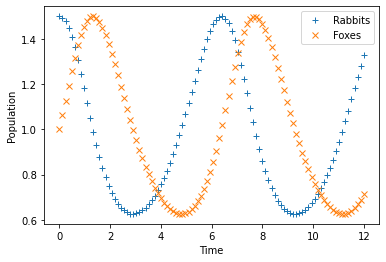

In [3]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

In [35]:
"""Using self-implementation - 1st order Euler method"""
a,b,c,d = 1,1,1,1

ts = np.linspace(0, 12, 100)
dt = ts[1]-ts[0]
N = len(ts)
P0 = [1.5, 1.0]

prey = [0]*N
predator = [0]*N

prey[0]=P0[0]
predator[0]=P0[1]

for i in np.arange(N-1):
    prey[i+1] = prey[i] + dt * (prey[i]*(a - b*predator[i]))
    predator[i+1] = predator[i] + dt * (-predator[i]*(c - d*prey[i]))

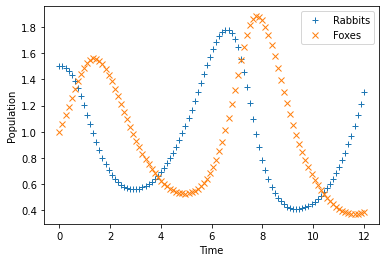

In [36]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predator, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

## How can we improve the Euler method?